# Understanding the Business Problem and Data Acquistion

## Business Understanding

For Supermarket the primary goals are:
- Reduce inventory costs by 15% while maintaining 95% service level.
- Improve demand forecast accuracy by 20%.
- Optimize pricing for seasonal products.

## Data Acqusition 

In [181]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [182]:
df=pd.read_csv(r"C:\Users\user\Python Programs\Resume Projects\Retail Store Inventory Forecasting\retail_store_inventory.csv")
print(f'Dataset shape is {df.shape}')

Dataset shape is (73100, 15)


In [183]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [185]:
df.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


Inventory Management:
- Stock levels fuctuated widely (50 to 500 units) risking stockouts and overstocking.
- Average stock is 274 units but restocking orders were only 110 units/day. 

Sales Volatility:
- Average daily sales of 136 units but ranged from 0 to 499 (extreme high and lows).
- Promotions (50% of days) and competitior pricing likely drove big swings

Pricing and Discounts:
- Average sales is 55 matching competitor pricing of 55.
- Discounts averaged 10%, but some days went upto 20% possibly too  frequent reducing their impact.

Competitor threats:
- Competitor sometimes priced items low as 5 and high as 104 forcing to adjust.

Faulty Demand Forecast:
- Predictions were sometimes illogical like the negative values of (-9.99) or overly optimistic (518 units vs actual price of 499 units).

In [186]:
print(f'Missing values')
df.isnull().sum()

Missing values


Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [187]:
for col in df.columns:
    if df[col].dtypes=='object':
        print(f'{col}')
        print(df[col].unique())
        print('---------------------------------------')

Date
['2022-01-01' '2022-01-02' '2022-01-03' '2022-01-04' '2022-01-05'
 '2022-01-06' '2022-01-07' '2022-01-08' '2022-01-09' '2022-01-10'
 '2022-01-11' '2022-01-12' '2022-01-13' '2022-01-14' '2022-01-15'
 '2022-01-16' '2022-01-17' '2022-01-18' '2022-01-19' '2022-01-20'
 '2022-01-21' '2022-01-22' '2022-01-23' '2022-01-24' '2022-01-25'
 '2022-01-26' '2022-01-27' '2022-01-28' '2022-01-29' '2022-01-30'
 '2022-01-31' '2022-02-01' '2022-02-02' '2022-02-03' '2022-02-04'
 '2022-02-05' '2022-02-06' '2022-02-07' '2022-02-08' '2022-02-09'
 '2022-02-10' '2022-02-11' '2022-02-12' '2022-02-13' '2022-02-14'
 '2022-02-15' '2022-02-16' '2022-02-17' '2022-02-18' '2022-02-19'
 '2022-02-20' '2022-02-21' '2022-02-22' '2022-02-23' '2022-02-24'
 '2022-02-25' '2022-02-26' '2022-02-27' '2022-02-28' '2022-03-01'
 '2022-03-02' '2022-03-03' '2022-03-04' '2022-03-05' '2022-03-06'
 '2022-03-07' '2022-03-08' '2022-03-09' '2022-03-10' '2022-03-11'
 '2022-03-12' '2022-03-13' '2022-03-14' '2022-03-15' '2022-03-16'
 '202

# EDA

## Data Cleaning & Preprocessing

In [188]:
df['Date']=pd.to_datetime(df['Date'])

In [189]:
print('Number of duplicates',df.duplicated().sum())

Number of duplicates 0


In [190]:
df['Day_of_week']=df['Date'].dt.dayofweek
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

## Descriptive Statistics & Visualizations

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

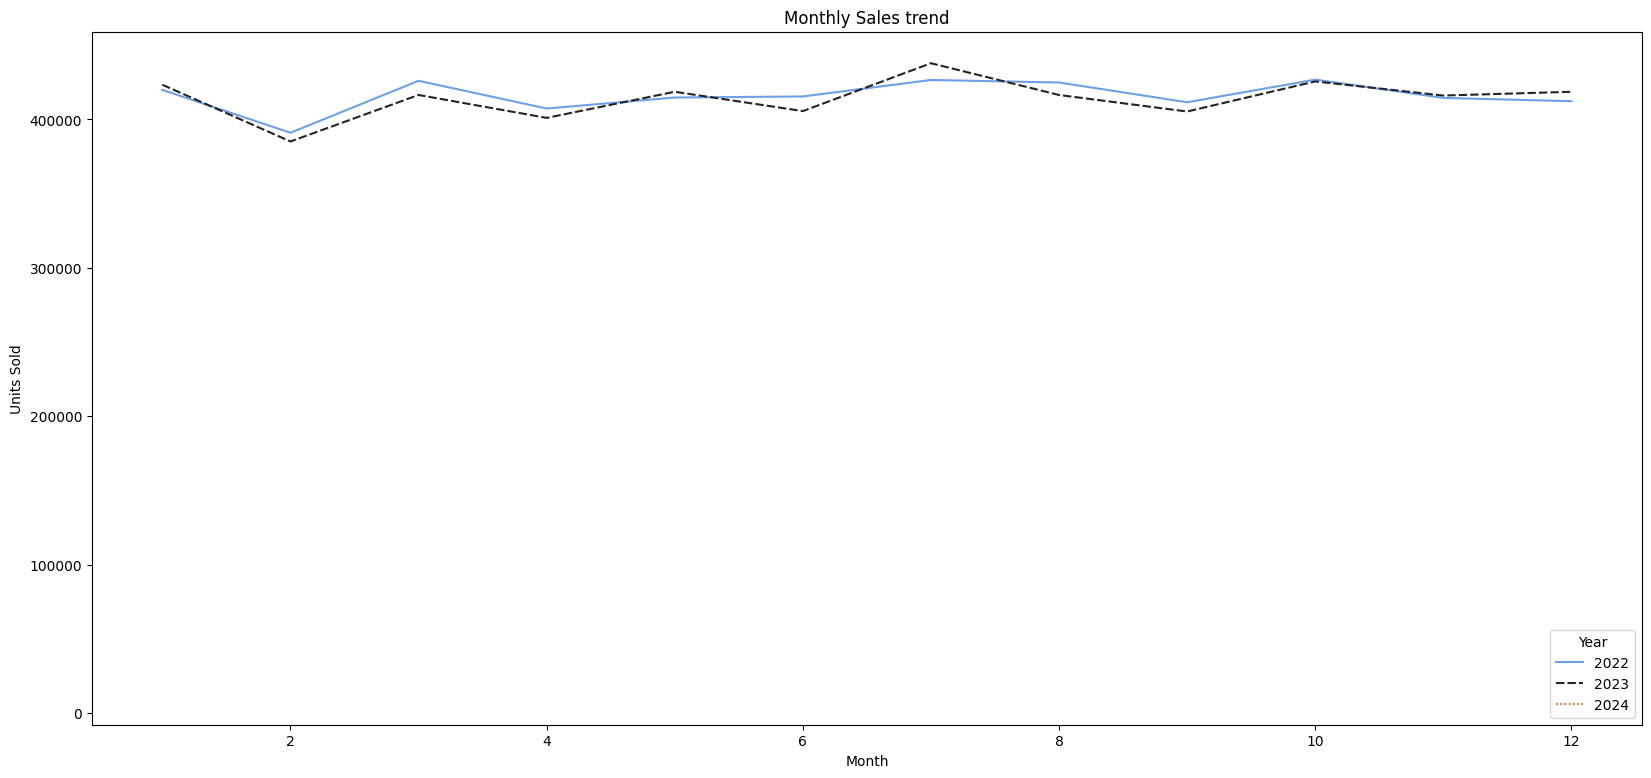

In [192]:
monthly_sales=df.groupby(by=['Month','Year'])['Units Sold'].sum().reset_index()
plt.figure(figsize=(20,9))
sns.lineplot(data=monthly_sales,x='Month',y='Units Sold',hue='Year',style='Year',palette=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True))
plt.title(label='Monthly Sales trend')
plt.show()

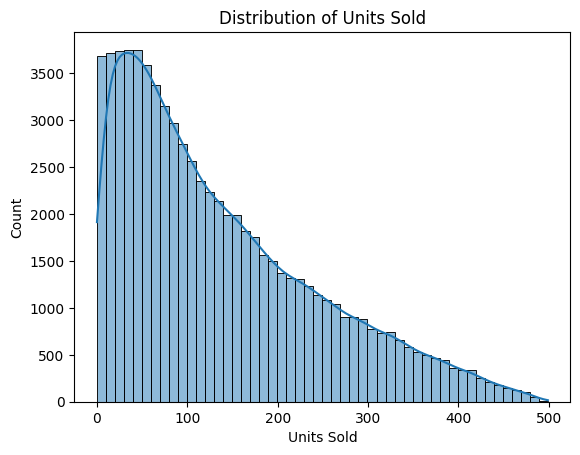

In [193]:
sns.histplot(df['Units Sold'], kde=True, bins=50)
plt.title("Distribution of Units Sold")
plt.show()


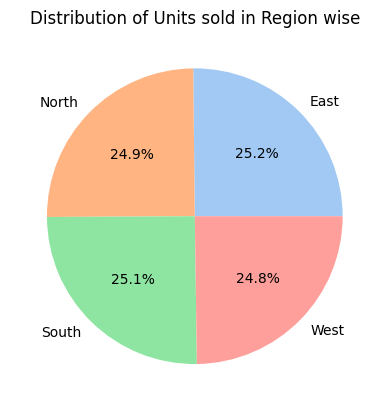

In [194]:
region_sales=df.groupby(by='Region')['Units Sold'].sum().reset_index()
plt.pie(x=region_sales['Units Sold'],labels=region_sales['Region'],colors=sns.color_palette('pastel'),autopct='%.1f%%',)
plt.title(label='Distribution of Units sold in Region wise')
plt.show()

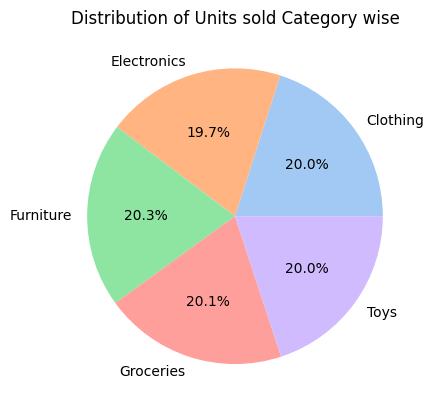

In [195]:
category_sales=df.groupby(by='Category')['Units Sold'].sum().reset_index()
plt.pie(x=category_sales['Units Sold'],labels=category_sales['Category'],colors=sns.color_palette('pastel'),autopct='%.1f%%')
plt.title(label='Distribution of Units sold Category wise')
plt.show()

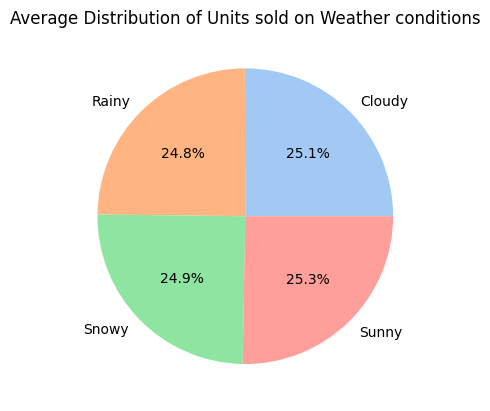

In [196]:
average_weather_sales=df.groupby(by='Weather Condition')['Units Sold'].mean().reset_index()
plt.pie(x=average_weather_sales['Units Sold'],labels=average_weather_sales['Weather Condition'],colors=sns.color_palette('pastel'),autopct='%.1f%%')
plt.title(label='Average Distribution of Units sold on Weather conditions')
plt.show()

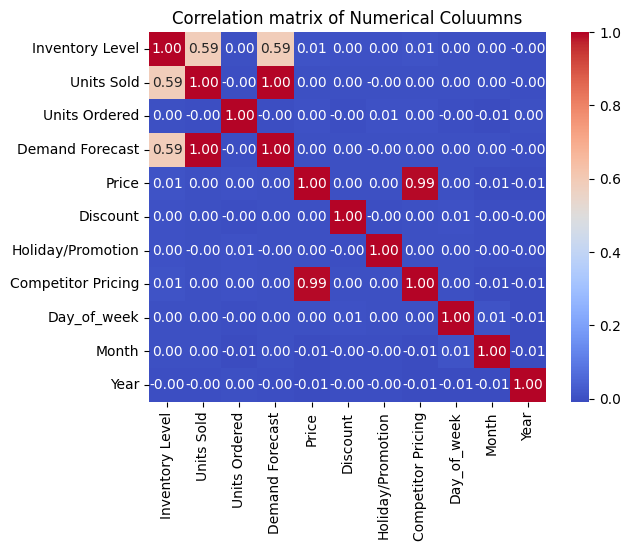

In [197]:
numerical_cols=df.select_dtypes(include=np.number)
sns.heatmap(data=numerical_cols.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation matrix of Numerical Coluumns')
plt.show()

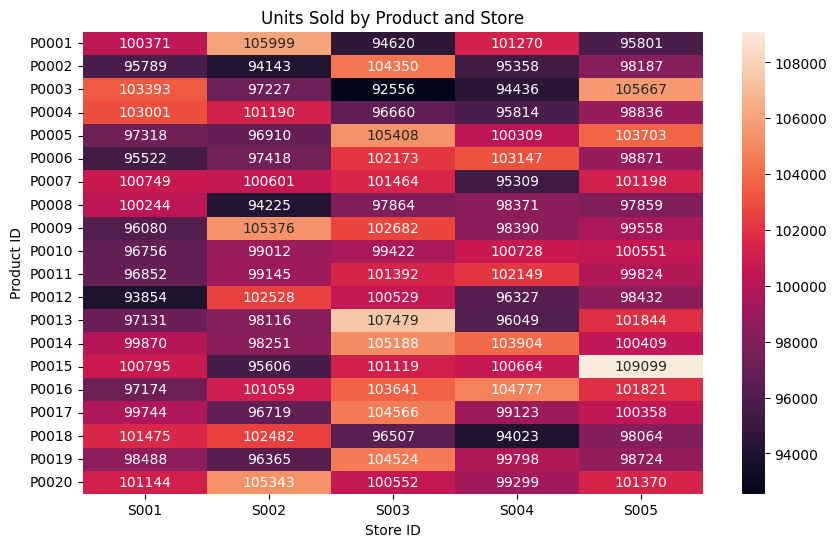

In [198]:
sales_by_product_store=df.groupby(by=['Product ID','Store ID'])['Units Sold'].sum().reset_index()
heatmap_data=sales_by_product_store.pivot(index='Product ID',columns='Store ID',values='Units Sold')
plt.figure(figsize=(10,6))
sns.heatmap(data=heatmap_data,annot=True,fmt='d')
plt.title('Units Sold by Product and Store')
plt.show()

# Feature Engineering

## Time-Based Features

In [199]:
for lag in [7,30]:
    df[f'Units_Sold_lag_{lag}']=df.groupby(by=['Product ID','Store ID'])['Units Sold'].shift(lag)

In [200]:
for mean in [7,30]:
    df[f'Rolling_mean{mean}']=df.groupby(by=['Product ID','Store ID'])['Units Sold'].transform(lambda x:x.rolling(window=mean).mean())

In [201]:
df['Sin_Day_of_Week']=np.sin(2*np.pi*(df['Day_of_week'])/7)
df['Cos_Day_of_Week']=np.cos(2*np.pi*(df['Day_of_week'])/7)
df['Sin_Month']=np.sin(2*np.pi*(df['Month'])/12)
df['Cos_Month']=np.cos(2*np.pi*(df['Month'])/12)

In [202]:
df['Pricing_Difference']=df['Price']-df['Competitor Pricing']

##  Target Variable Engineering

In [203]:
df['Next_Day_Demand']=df.groupby(by=['Product ID','Store ID'])['Units Sold'].shift(-1)

## Feature Selection

In [204]:
corr_matrix=df.select_dtypes(include=['int64','float64']).corr().abs()
upper_tri=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype('bool'))
to_drop=[col for col in upper_tri.columns if any(upper_tri[col]>0.95)]

In [205]:
df=df.drop(columns=to_drop)

In [206]:
df=df.dropna()

In [207]:
(2*df.shape[0])/3

46666.666666666664

In [208]:
train=df.iloc[:46666]
test=df.iloc[46666:]

In [209]:
features=['Inventory Level','Price','Discount','Units_Sold_lag_7','Units_Sold_lag_30','Rolling_mean7','Rolling_mean30',
         'Sin_Day_of_Week','Cos_Day_of_Week','Sin_Month','Cos_Month','Pricing_Difference','Holiday/Promotion']

In [210]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Price', 'Discount',
       'Weather Condition', 'Holiday/Promotion', 'Seasonality', 'Day_of_week',
       'Month', 'Year', 'Units_Sold_lag_7', 'Units_Sold_lag_30',
       'Rolling_mean7', 'Rolling_mean30', 'Sin_Day_of_Week', 'Cos_Day_of_Week',
       'Sin_Month', 'Cos_Month', 'Pricing_Difference', 'Next_Day_Demand'],
      dtype='object')

# Time-Series Modeling for Demand Forecasting

In [211]:
from sklearn.preprocessing import MinMaxScaler

## Preprocessing DATA

In [212]:
x_train,y_train=train[features],train['Next_Day_Demand']
x_test,y_test=test[features],test['Next_Day_Demand']

In [213]:
x_scaled=MinMaxScaler()
x_train_scaled=x_scaled.fit_transform(x_train)
x_test_scaled=x_scaled.transform(x_test)

In [214]:
y_sclaed=MinMaxScaler()
y_train_scaled=y_sclaed.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled=y_sclaed.transform(y_test.values.reshape(-1,1))

Lets give input to the LSTM in the form of (samples,time_steps,features)
- So lets create a window size of 30 to get the features fom (0 to 29) days and the output for those will be the 30th day.
- Therefore the input for LSTM will be (46666,30,10)

In [215]:
def create_sequence(X,y,time_steps=30):
    Xs,ys=[],[]
    for i in range(time_steps,len(X)):
        Xs.append(X[i-time_steps:i])
        ys.append(y[i])
    return np.array(Xs),np.array(ys)

In [234]:
time_steps=60
x_train_seq,y_train_seq=create_sequence(x_train_scaled,y_train_scaled,time_steps)
x_test_seq,y_test_seq=create_sequence(x_test_scaled,y_test_scaled,time_steps)

In [235]:
print(x_train_seq.shape)
print(y_train_seq.shape)
print(x_test_seq.shape)
print(y_test_seq.shape)

(46606, 60, 13)
(46606, 1)
(23274, 60, 13)
(23274, 1)


## ARIMA

In [218]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [219]:
adf_test=adfuller(x=df['Units_Sold_lag_30'],autolag='AIC')
df_adf_output=pd.Series(data=adf_test[:4],index=['Test_Statistic','p-value','Lags_used','Number_of_Observation_Used'])
if df_adf_output['p-value']<0.05:
    print('the data is Statinary')
else:
    print('the data is non Stationary')

the data is Statinary


- Your Units sold data dosent need differencing before time Series modelling like (ARIMA)
- ACF/PACF analysis can now be performed directly on this Series.
- The zero lags used suggest no autocorrelation terms were needed in this test

<Figure size 1000x1000 with 0 Axes>

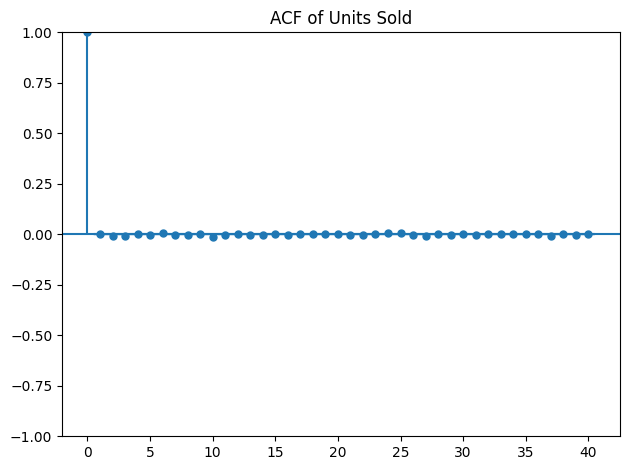

In [220]:
plt.figure(figsize=(10,10))
plot_acf(x=df['Units_Sold_lag_30'],lags=40,alpha=0.05,title='ACF of Units Sold')
plt.tight_layout()
plt.show()

<Figure size 1000x1000 with 0 Axes>

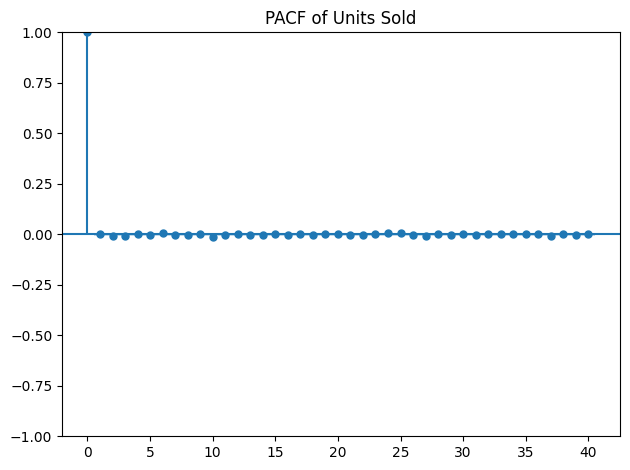

In [221]:
plt.figure(figsize=(10,10))
plot_pacf(x=df['Units_Sold_lag_30'],lags=40,alpha=0.05,title='PACF of Units Sold')
plt.tight_layout()
plt.show()

From the ACF and PACF plots we found that :
-  Best Model: AR(1) (ARIMA(1,1,1)).
-  No Differencing Needed: Data is already stationary (from ADF test).
-  No Seasonality: No fixed-interval spikes (weekly/monthly).

In [222]:
model_arima=ARIMA(y_train,order=(1,1,1))
result_arima=model_arima.fit()
arima_forecast=result_arima.forecast(steps=len(y_test))

In [223]:
mae_arima=mean_absolute_error(y_test,arima_forecast)
print(f'ARIMA MAE is {mae_arima}')

ARIMA MAE is 88.9886609756304


## LSTM

In [253]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop

In [254]:
model_lstm=Sequential()
model_lstm.add(LSTM(units=64,activation='relu',input_shape=(x_train_seq.shape[1],x_train_seq.shape[2])))
model_lstm.add(Dense(units=32,activation='relu'))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam',loss='mse')

In [255]:
history=model_lstm.fit(x_train_seq,y_train_seq,epochs=20,batch_size=32,validation_data=(x_test_seq,y_test_seq))

Epoch 1/20
1457/1457 [==============================] - 34s 23ms/step - loss: 0.0490 - val_loss: 0.0484
Epoch 2/20
1457/1457 [==============================] - 33s 23ms/step - loss: 0.0486 - val_loss: 0.0490
Epoch 3/20
1457/1457 [==============================] - 32s 22ms/step - loss: 0.0485 - val_loss: 0.0482
Epoch 4/20
1457/1457 [==============================] - 33s 23ms/step - loss: 0.0485 - val_loss: 0.0482
Epoch 5/20
1457/1457 [==============================] - 32s 22ms/step - loss: 0.0485 - val_loss: 0.0485
Epoch 6/20
1457/1457 [==============================] - 33s 22ms/step - loss: 0.0485 - val_loss: 0.0482
Epoch 7/20
1457/1457 [==============================] - 32s 22ms/step - loss: 0.0485 - val_loss: 0.0482
Epoch 8/20
1457/1457 [==============================] - 33s 22ms/step - loss: 0.0485 - val_loss: 0.0482
Epoch 9/20
1457/1457 [==============================] - 33s 23ms/step - loss: 0.0485 - val_loss: 0.0485
Epoch 10/20
1457/1457 [==============================] - 33s 23m

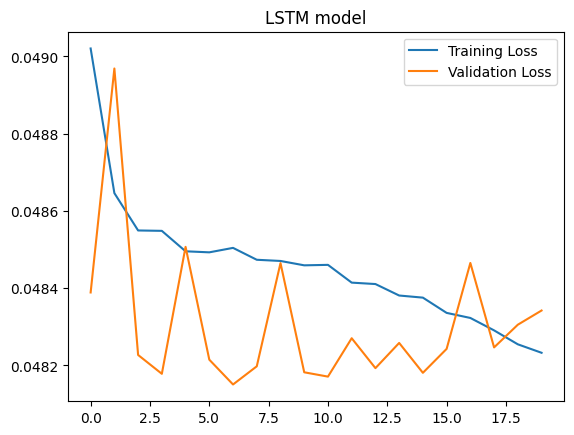

In [256]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title(label='LSTM model')
plt.legend()
plt.show()

In [257]:
y_pred_scaled = model_lstm.predict(x_test_seq)
y_pred = y_sclaed.inverse_transform(y_pred_scaled)
y_true = y_sclaed.inverse_transform(y_test_seq)

728/728 [==============================] - 5s 7ms/step


In [258]:
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)


In [259]:
print(f"🔹 MSE  : {mse:.2f}")
print(f"🔹 RMSE : {rmse:.2f}")
print(f"🔹 MAE  : {mae:.2f}")
print(f"🔹 R²   : {r2:.4f}")

🔹 MSE  : 11892.98
🔹 RMSE : 109.05
🔹 MAE  : 89.51
🔹 R²   : -0.0042
